![Github_top](https://user-images.githubusercontent.com/33735397/206313977-e67ba652-3340-4a1b-b1d1-141d8d5001f2.PNG)

# Research-Oriented Streamflow Evaluation Tool (ROSET)

National-scale streamflow modeling remains a modern challenge, as changes in the underlying hydrology from land use and land cover (LULC) change, anthropogentic streamflow modification, and general process components (reach length, hydrogeophysical processes, precipitation, temperature, etc) greatly influence  hydrological modeling.
In a changing climate, there is a need to anticipate flood intensity, impacts of groundwater depletion on streamflow, western montain low-flow events, eastern rain-on-snow events, storm-induced flooding, and other severe environmental problems that challenge the management of water resources.
Given the National Water Model (NWM) bridges the gap between the spatially coarse USGS streamflow observations by providing a near-continuous 2.7 million reach predictions of streamflow, there lies the potential to improve upon the capabilities of the model by characterizing predictive performance across the heterogeneity of processes and land covers present at the national scale. 
The python-based Research-Oriented Streamflow Evaluation Tool (ROSET) package provides a tool to evaluate national hydrogrphy dataset (nhd) based model outputs with colocated USGS/NWIS streamflow monitorng stations (parameter: 060). 
The package contains three key methods for evaluation: state-based LULC, HUC level analysis, and USGS station-based analysis.
Below is a description of each method and application.
While designed to us the NWM version 2.1 retrospective dataset, with minimal modification the tool should be able to take in other model formulations.
By using the ROSET, researchers can identify locations where a model may benefit from further training/calibration/parameterization or a need for new model processes/features (e.g., integration of reservoir release operaitons) to ultimately create new post-processing methods and/or hydrological modeling formulations to improve streamflow prediction capabilities with respect to modeling needs (e.g., stormflow, supply, emergency management, flooding, etc).   


In [1]:
import ROSET_AWS
import os
import warnings
warnings.filterwarnings("ignore")
#set path directory
cwd = os.getcwd()

# Streamflow Evaluator: State Class

This section of code allows the user to evaluate modeled streamflow with observed in situ NWIS monitoring sites.
Please enter a start date, end date, frequency, state of interest, and model to compare (NWM v2.1 is set up).
Select the below classes to evaluate model performance, set the classification to the provided term

Tell the model what type of classification you are interested in:

* Drainage area breaks: <span style="color:red">"Drainage_area_mi2" </span>
* Elevation breaks: <span style="color:red">"Mean_Basin_Elev_ft"</span>
* Forest area breaks: <span style="color:red">"Perc_Forest"</span>
* Developed area breaks: <span style="color:red">"Perc_Develop"</span>
* Impervious area breaks: <span style="color:red">"Perc_Imperv"</span>
* Herbacious area breaks: <span style="color:red">"Perc_Herbace"</span>
* Slope area > 30 degrees breaks: <span style="color:red">"Perc_Slop_30"</span>
* Precipitation breaks: <span style="color:red">"Mean_Ann_Precip_in"</span>
* low flows: <span style="color:red">"Ann_low_cfs"</span>
* Mean flows: <span style="color:red">"Ann_mean_cfs"</span>
* High flows: <span style="color:red">"Ann_hi_cfs"</span>

![LULC_Eval_top_image](https://user-images.githubusercontent.com/33735397/206321617-354fbbe1-3a61-4be2-8234-daf95fd4d926.PNG)


In [2]:
#Set desired start and end date, state, model for comparision, and LULC class
startDT ='2011-5-24'
endDT ='2011-8-24' #last day of data is 2020-09-28
state = 'ut'
#the model name must match with the folder name in which model predictions are in.
#model = 'NWM'
model = 'NWM_v2.1'
classification = 'Drainage_area_mi2'

#Inititate Streamflow Evaluator
State_Eval = ROSET_AWS.LULC_Eval(model, state, startDT, endDT, cwd)

#get state specific NWIS locations
State_Eval.get_NWIS()
State_Eval.get_NHD_Model_info()
State_Eval.class_eval_state(classification)

Getting NWIS Streamstats
Getting NHD reaches
Categorical breaks for  Drainage_area_mi2 :  [0.000154, 1740.0, 7040.0, 15700.0, 25500.0, 44300.0]


## Interactive Streamflow plotting.

Categorical break: 
* <span style="color:red">very small</span>: State_Eval.df_vsmall
* <span style="color:red">small</span>: State_Eval.df_small
* <span style="color:red">medium</span>: State_Eval.df_medium
* <span style="color:red">large</span>: State_Eval.df_large
* <span style="color:red">very large</span>: State_Eval.df_vlarge
    
Get a map of locations with plots of NWM vs. OBS
Set frequency for graph:
* <span style="color:red">'D'</span>: Daily
* <span style="color:red">'M'</span>: monthly, 
* <span style="color:red">'Q'</span>: quarterly, 
* <span style="color:red">'A'</span>: annual

Set supply = <span style="color:green"> **True** </span> to evaluate cumulative water year totals or <span style = "color:green"> **False** </span> to look at desired temporal resolution

In [3]:
#Input temporal frequency, DF size, and DF size term -- make site name appear with mouse hover
State_Eval.Map_Plot_Eval('M', State_Eval.df_small, 'small', supply = False)

Getting  NWM_v2.1  data


100% |########################################################################|


Getting NWIS data


100% |########################################################################|


Plotting monitoring station locations


## Interactive Plotting 

Running the dataframe will show all properties and sites
Set frequency for graph:
* <span style="color:red">'D'</span>: Daily
* <span style="color:red">'M'</span>: monthly, 
* <span style="color:red">'Q'</span>: quarterly, 
* <span style="color:red">'A'</span>: annual

Set supply = <span style="color:green"> **True** </span> to evaluate cumulative water year totals or <span style = "color:green"> **False** </span> to look at desired temporal resolution

NWIS_site_id  NHD_reachid                                        Location  \
0      09306500      5308854                   WHITE RIVER NEAR WATSON, UTAH   
1      09180000     18369916                    DOLORES RIVER NEAR CISCO, UT   
2      09295000     11982097                     DUCHESNE RIVER AT MYTON, UT   
3      09302000     11985487                DUCHESNE RIVER NEAR RANDLETT, UT   
4      10126000      4605050                     BEAR RIVER NEAR CORINNE, UT   
5      09295100     11985621     DUCHESNE RIV ABV UINTA RIV, NR RANDLETT, UT   
6      10219000      1202046                      SEVIER RIVER NEAR JUAB, UT   
7      10217000      3503647    SEVIER RIV BLW SAN PITCH RIV NR GUNNISON, UT   
8      10224000      1200162                   SEVIER RIVER NEAR LYNNDYL, UT   
9      09413200      4914292               VIRGIN RIVER NEAR BLOOMINGTON, UT   
10     09413500      4914802                VIRGIN RIVER NEAR ST. GEORGE, UT   
11     10171000     10390290  JORDAN RIVER @ 1700 SOUTH @ SALT LAKE CITY, UT   

       RMSE  MaxError          MAPE        KGE  Drainage_area_mi2  \
0     66896     83640     15.697505   0.751144             3900.0   
1     20025     23264     10.617040   0.331401             4570.0   
2    722809    894583    187.367013  -1.228078             2650.0   
3    950157   1199132    187.884525  -1.672029             3790.0   
4    612438    801227    105.620067  -1.964897             7040.0   
5    790955    989297    237.227359  -2.012931             2710.0   
6   1016650   1231869    469.085654  -6.084613             5160.0   
7    959094   1173901    369.175514  -7.503672             4920.0   
8   1150180   1395109    794.768759 -10.036433             6010.0   
9    133735    170963    311.439780 -12.200355             3850.0   
10   164977    203616   2347.741440 -22.072639             3980.0   
11   908124   1175689  12204.411424 -79.085811             3430.0   

    Mean_Basin_Elev_ft  Perc_Forest  Perc_Imperv  Perc_Herbace  \
0               7140.0         41.6         0.27         12.10   
1               7690.0         56.3         0.23          8.55   
2               8050.0         42.5         0.16          6.54   
3               7870.0         39.7         0.26          6.07   
4               6620.0         15.6         0.55         15.20   
5               7990.0         41.7         0.18          6.49   
6               7520.0         42.7         0.45          7.97   
7               7600.0         43.8         0.46          7.69   
8               7290.0         40.2         0.47          8.32   
9               5410.0         23.9         0.51         11.50   
10              5350.0         23.2         0.53         11.40   
11              6440.0         41.7         4.37          6.35   

    Mean_Ann_Precip_in  Ann_low_cfs  Ann_mean_cfs  Ann_hi_cfs  
0                 18.8        288.7         643.0      1201.0  
1                 20.4        101.8         551.0      1772.0  
2                 20.0         39.8         293.0      1252.0  
3                 19.0         46.2         426.0      1813.0  
4                 22.2        402.5        1581.0      4989.0  
5                 19.8         34.2         210.0      1179.0  
6                 17.2        119.6         278.0      1366.0  
7                 17.3        104.3         292.0      1319.0  
8                 17.0        135.0         270.0      1438.0  
9                 14.9         56.4         203.0       707.2  
10                14.7         62.6         191.0       688.4  
11                21.4        100.9         138.0       225.2

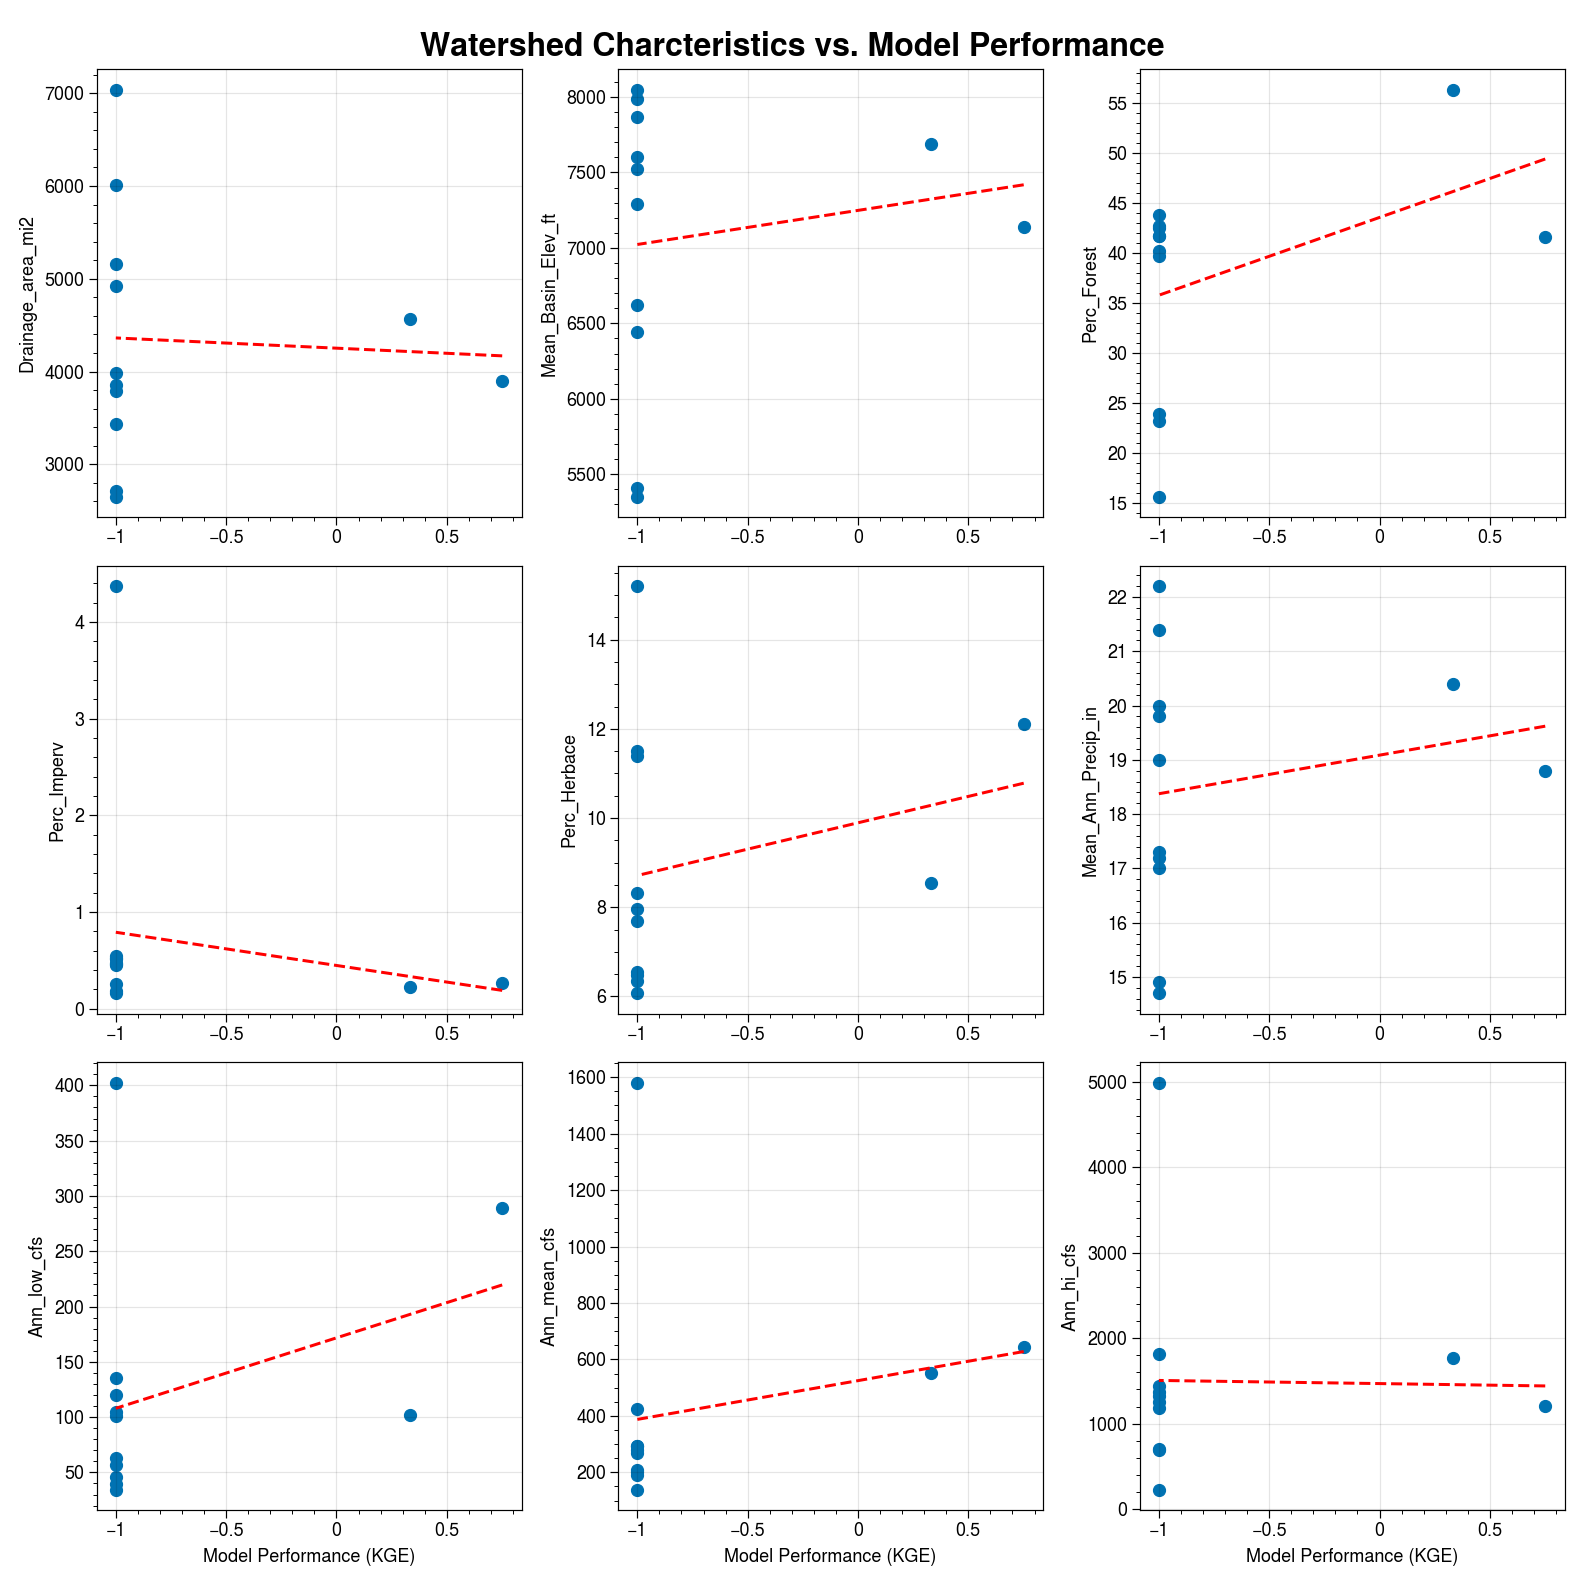

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_09306500                  :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_5308854 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                               :Rectangles   [x0,y0,x1,y1]
      .Text.I                                     :Text   [x,y]
      .Text.II                                    :Text   [x,y]
      .Text.III                                   :Text   [x,y]
      .Text.IV                                    :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_09180000                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_18369916 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_09295000                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_11982097 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_09302000                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_11985487 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10126000                  :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_4605050 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                               :Rectangles   [x0,y0,x1,y1]
      .Text.I                                     :Text   [x,y]
      .Text.II                                    :Text   [x,y]
      .Text.III                                   :Text   [x,y]
      .Text.IV                                    :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_09295100                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_11985621 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10219000                  :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_1202046 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                               :Rectangles   [x0,y0,x1,y1]
      .Text.I                                     :Text   [x,y]
      .Text.II                                    :Text   [x,y]
      .Text.III                                   :Text   [x,y]
      .Text.IV                                    :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10217000                  :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_3503647 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                               :Rectangles   [x0,y0,x1,y1]
      .Text.I                                     :Text   [x,y]
      .Text.II                                    :Text   [x,y]
      .Text.III                                   :Text   [x,y]
      .Text.IV                                    :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10224000                  :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_1200162 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                               :Rectangles   [x0,y0,x1,y1]
      .Text.I                                     :Text   [x,y]
      .Text.II                                    :Text   [x,y]
      .Text.III                                   :Text   [x,y]
      .Text.IV                                    :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_09413200                  :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_4914292 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                               :Rectangles   [x0,y0,x1,y1]
      .Text.I                                     :Text   [x,y]
      .Text.II                                    :Text   [x,y]
      .Text.III                                   :Text   [x,y]
      .Text.IV                                    :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_09413500                  :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_4914802 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                               :Rectangles   [x0,y0,x1,y1]
      .Text.I                                     :Text   [x,y]
      .Text.II                                    :Text   [x,y]
      .Text.III                                   :Text   [x,y]
      .Text.IV                                    :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10171000                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10390290 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

In [4]:

State_Eval.Interactive_Model_Eval('Q', supply = True)

Use State_Eval.Eval.NWIS_site_id if you would like to get the respective NWIS/Modeled site/reaches to plug into the Reach Evaluator class

# Streamflow evaluation: HUC Class

This section of code allows the user to evaluate modeled streamflow with observed in situ NWIS monitoring sites 
for a watershed(s) of interest. The user can input multiple watersheds (e.g., Great Salt lake: ['1601', '1602']).
Enter a start date, end date, watersheds and model to compare (NWM v2.1 is set up).
NWM retrospective data spans from 1980 - 2020, USGS/NWIS data is location dependent

Use [The National Map Watershed Boundary Dataset (WBD)]() to identify the HUC size and unit code of interestto locate HUC of interest.

![HUC_Eval_top](https://user-images.githubusercontent.com/33735397/206322410-ea0e210c-c805-4599-ad6b-704c76ba42ce.PNG)


In [2]:
#Enter a starting date, model for evaluation, and the respectrive HUC id(s)

startDT ='2020-1-01'
endDT ='2020-9-30'
model = 'NWM_v2.1'
HUCids = ['1601', '1602'] #must be in brackets, add multiple HUCs to complete a watershed (e.g. GSL basin), East vs. West. etc
#0802 causing issues, is the state there?
#Initiate function
HUC_Eval = ROSET_AWS.HUC_Eval(model, HUCids, startDT, endDT, cwd)


In [3]:
#Match NWIS locations within HUC watershed
HUC_Eval.Join_WBD_StreamStats()

Getting geospatial information for HUC:  ['1601', '1602']
['1601', '1602']
No AWS access, trying local directory
Found data in local directory
No AWS access, trying local directory
Found data in local directory
Finding NWIS monitoring stations within  ['1601', '1602']  watershed boundary
Creating dataframe of NWIS stations within  ['1601', '1602']  watershed boundary


In [4]:
#Get NWM reaches for each NWIS monitoring station
HUC_Eval.get_NHD_Model_info()

#Get NWM and NWIS data to compare
HUC_Eval.prepare_comparison() # run the apply function to not have to run it during evaluation

Getting collocated  NWM_v2.1  NHD reaches with NWIS monitoring locations


Getting  NWM_v2.1  data


100% |########################################################################|


Getting NWIS data


100% |########################################################################|


## Interactive plotting on map
Set frequency for graph:
* <span style="color:red">'D'</span>: Daily
* <span style="color:red">'M'</span>: monthly, 
* <span style="color:red">'Q'</span>: quarterly, 
* <span style="color:red">'A'</span>: annual

Set supply = <span style="color:green"> **True** </span> to evaluate cumulative water year totals or <span style = "color:green"> **False** </span> to look at desired temporal resolution

In [6]:
#Run Map function
HUC_Eval.Map_Plot_Eval('D', supply = False)

Plotting monitoring station locations


## Interactive time series plotting
Set frequency for graph:
* <span style="color:red">'D'</span>: Daily
* <span style="color:red">'M'</span>: monthly, 
* <span style="color:red">'Q'</span>: quarterly, 
* <span style="color:red">'A'</span>: annual

Set supply = <span style="color:green"> **True** </span> to evaluate cumulative water year totals or <span style = "color:green"> **False** </span> to look at desired temporal resolution

NWIS_site_id  NHD_reachid  \
0      10011500      7887898   
1      10149400     10349220   
2      10154200     10373692   
3      10155000     10373622   
4      10146000     10330245   
5      10153100     10348934   
6      10172870     10683178   
7      10131000     10093066   
8      10109000       664424   
9      10023000      7880800   
10     10128500     10093110   
11     10133600     10276878   
12     10150500     10349360   
13     10145400     10331031   
14     10137500     10274270   
15     10149000     10349162   
16     10132500     10089426   
17     10105900       666170   
18     10156000     10375650   
19     10155500     10375648   
20     10155200     10373794   
21     10140700     10274376   
22     10132000     10093052   
23     10172800     10395905   
24     10126000      4605050   
25     10168000     10389562   
26     10134500     10277268   
27     10133800     10276836   
28     10133650     10276856   
29     10140100     10275828   
30     10164500     10329013   
31     10133980     10276712   
32     10130500     10092262   
33     10136500     10274616   
34     10146400     10331001   
35     10129500     10093214   
36     10172952      1169706   
37     10113500       666156   
38     10129900     10093082   
39     10172700     10396937   
40     10163000     10376596   
41     10166430     10327201   
42     10092700      4560060   
43     10068500      4472049   
44     10141000     10273232   
45     10171000     10390290   
46     10039500      7898927   
47     10157500     10375690   
48     10172727     10396113   

                                             Location    RMSE  MaxError  \
0             BEAR RIVER NEAR UTAH-WYOMING STATE LINE    3549      5997   
1          DIAMOND FORK ABV RED HOLLOW NR THISTLE, UT     998      1753   
2                       PROVO RIVER NEAR WOODLAND, UT    5157      6974   
3                      PROVO RIVER NEAR HAILSTONE, UT    8080     13452   
4                             SALT CREEK AT NEPHI, UT     137       265   
5      HOBBLE CREEK AT 1650 WEST AT SPRINGVILLE, UTAH    1192      2299   
6                         TROUT CREEK NEAR CALLAO, UT     203       346   
7                        CHALK CREEK AT COALVILLE, UT    1687      2428   
8         LOGAN RIVER ABOVE STATE DAM, NEAR LOGAN, UT    6701     16050   
9                         BIG CREEK NEAR RANDOLPH, UT     132       185   
10                        WEBER RIVER NEAR OAKLEY, UT    7693     17354   
11                    MCLEOD CREEK NEAR PARK CITY, UT     380       512   
12                       SPANISH FORK AT CASTILLA, UT    8119     12891   
13      SALT CRK BL NEPHI POWERPLANT DIV NR NEPHI, UT     191       319   
14         SOUTH FORK OGDEN RIVER NEAR HUNTSVILLE, UT    2822      6321   
15     SIXTH WATER CRK AB SYAR TUN NR SPRINGVILLE, UT    1194      1837   
16                      LOST CREEK NEAR CROYDON, UTAH     876      1543   
17                  LITTLE BEAR RIVER AT PARADISE, UT    1911      2849   
18                    SNAKE CREEK NEAR CHARLESTON, UT    1223      1669   
19                    PROVO RIVER NEAR CHARLESTON, UT   19152     34737   
20     PROVO RIV AT RIV ROAD BRIDGE NR HEBER CITY, UT   20003     37239   
21          OGDEN RIVER NR GIBSON AVENUE AT OGDEN, UT    8412     10921   
22                            WEBER RIVER AT ECHO, UT   31693     60229   
23            SOUTH WILLOW CREEK NEAR GRANTSVILLE, UT     674      1318   
24                        BEAR RIVER NEAR CORINNE, UT  104843    142296   
25      LITTLE COTTONWOOD CREEK @ JORDAN RIVER NR SLC    6290     12883   
26                  EAST CANYON CREEK NEAR MORGAN, UT    7842     10299   
27            EAST CANYON CREEK NEAR JEREMY RANCH, UT    3405      4098   
28     E CANYON CR BL I-80 REST STOP NR PARK CITY, UT    2272      2688   
29      OGDEN RIVER BL PINEVIEW RES NR HUNTSVILLE, UT    9733     13014   
30  AMERICAN FK AB UPPER POWERPLANT NR AMERICAN FK...    8045     17301   
31

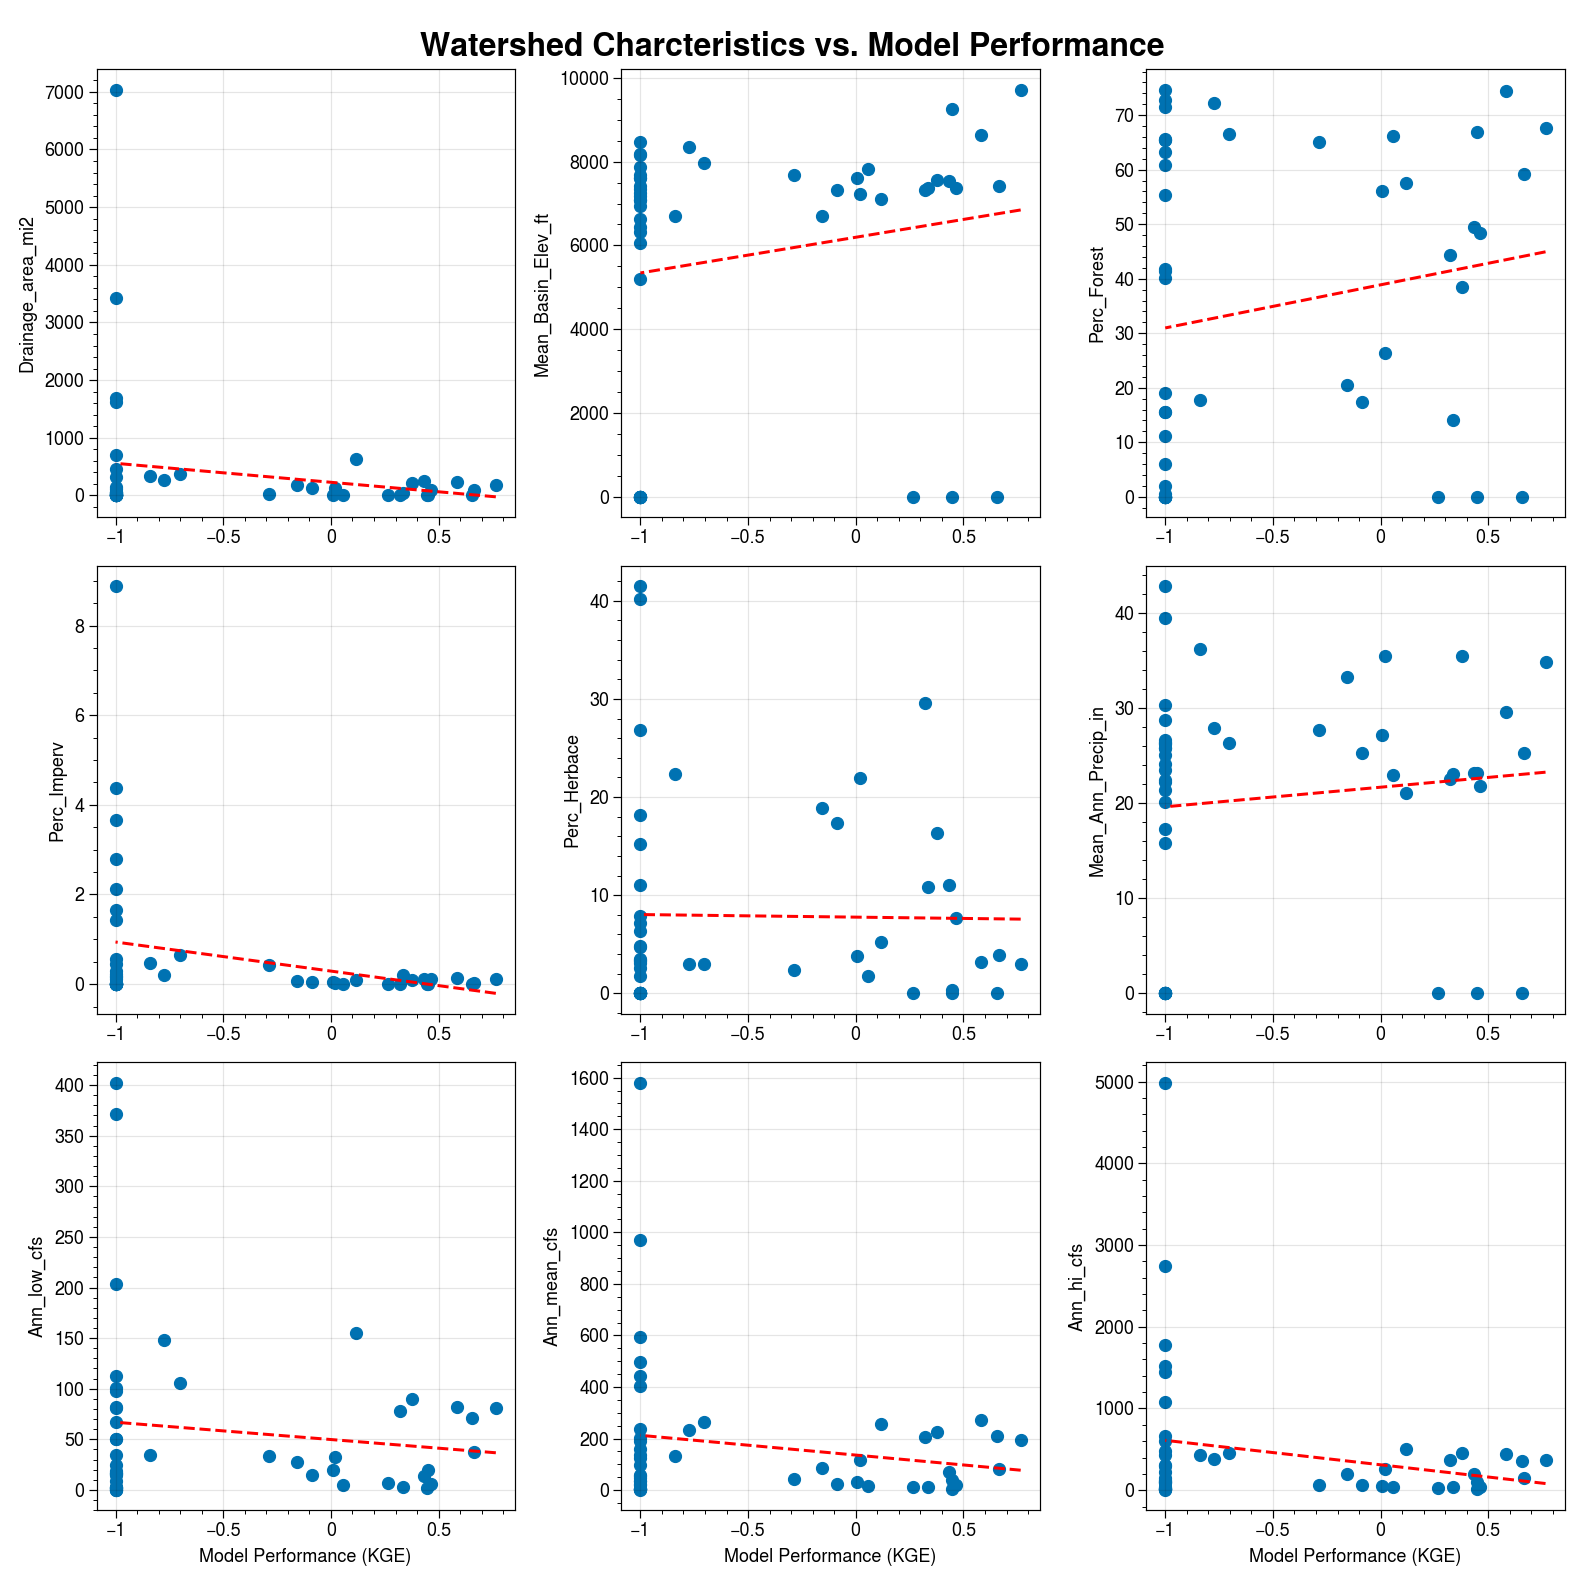

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10011500                  :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_7887898 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                               :Rectangles   [x0,y0,x1,y1]
      .Text.I                                     :Text   [x,y]
      .Text.II                                    :Text   [x,y]
      .Text.III                                   :Text   [x,y]
      .Text.IV                                    :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10149400                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10349220 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10154200                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10373692 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10155000                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10373622 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10146000                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10330245 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10153100                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10348934 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10172870                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10683178 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10131000                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10093066 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10109000                 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_664424 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                              :Rectangles   [x0,y0,x1,y1]
      .Text.I                                    :Text   [x,y]
      .Text.II                                   :Text   [x,y]
      .Text.III                                  :Text   [x,y]
      .Text.IV                                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10023000                  :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_7880800 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                               :Rectangles   [x0,y0,x1,y1]
      .Text.I                                     :Text   [x,y]
      .Text.II                                    :Text   [x,y]
      .Text.III                                   :Text   [x,y]
      .Text.IV                                    :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10128500                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10093110 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10133600                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10276878 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10150500                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10349360 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10145400                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10331031 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10137500                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10274270 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10149000                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10349162 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10132500                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10089426 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10105900                 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_666170 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                              :Rectangles   [x0,y0,x1,y1]
      .Text.I                                    :Text   [x,y]
      .Text.II                                   :Text   [x,y]
      .Text.III                                  :Text   [x,y]
      .Text.IV                                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10156000                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10375650 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10155500                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10375648 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10155200                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10373794 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10140700                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10274376 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10132000                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10093052 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10172800                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10395905 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10126000                  :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_4605050 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                               :Rectangles   [x0,y0,x1,y1]
      .Text.I                                     :Text   [x,y]
      .Text.II                                    :Text   [x,y]
      .Text.III                                   :Text   [x,y]
      .Text.IV                                    :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10168000                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10389562 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10134500                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10277268 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10133800                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10276836 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10133650                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10276856 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10140100                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10275828 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10164500                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10329013 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10133980                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10276712 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10130500                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10092262 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10136500                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10274616 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10146400                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10331001 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10129500                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10093214 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10172952                  :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_1169706 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                               :Rectangles   [x0,y0,x1,y1]
      .Text.I                                     :Text   [x,y]
      .Text.II                                    :Text   [x,y]
      .Text.III                                   :Text   [x,y]
      .Text.IV                                    :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10113500                 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_666156 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                              :Rectangles   [x0,y0,x1,y1]
      .Text.I                                    :Text   [x,y]
      .Text.II                                   :Text   [x,y]
      .Text.III                                  :Text   [x,y]
      .Text.IV                                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10129900                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10093082 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10172700                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10396937 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10163000                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10376596 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10166430                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10327201 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10092700                  :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_4560060 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                               :Rectangles   [x0,y0,x1,y1]
      .Text.I                                     :Text   [x,y]
      .Text.II                                    :Text   [x,y]
      .Text.III                                   :Text   [x,y]
      .Text.IV                                    :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10068500                  :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_4472049 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                               :Rectangles   [x0,y0,x1,y1]
      .Text.I                                     :Text   [x,y]
      .Text.II                                    :Text   [x,y]
      .Text.III                                   :Text   [x,y]
      .Text.IV                                    :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10141000                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10273232 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10171000                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10390290 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10039500                  :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_7898927 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                               :Rectangles   [x0,y0,x1,y1]
      .Text.I                                     :Text   [x,y]
      .Text.II                                    :Text   [x,y]
      .Text.III                                   :Text   [x,y]
      .Text.IV                                    :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10157500                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10375690 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10172727                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10396113 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

In [9]:
#Plot evaluation
HUC_Eval.Interactive_Model_Eval('M', supply = False)

# Streamflow Evaluation: Reach Class

This section of code allows the user to evaluate modeled streamflow with selected NWIS monitoring sites of interest. 
The user can input multiple USGS sites (e.g., ['02378780', '02339495', '02342500'])
Please enter a start date, end date, and model to compare (NWM v2.1 is set up).
NWM retrospective data spans from 1980 - 2020, USGS/NWIS data is location dependent.

![REach_Eval_top](https://user-images.githubusercontent.com/33735397/206324095-dcc59508-bf4c-43a8-9a19-4fc5c573e205.PNG)

In [2]:
#Put in model of interest for evaluation, NWIS/USGS site id(s), and the start/end date

#model = 'NWM_v2.1'
model = 'XGBoost'
#example with list of USGS sites along the Provo River, Utah
#NWIS_list = ['10155000', '10155200'] #, '10155500', '10155200', '10154200']
NWIS_list = ['10126000', '10130500', '10134500', '10136500', '10137500', '10141000', '10155000', '10164500', '10171000' ] # 02450000 is a bad site and good for breaking ROSET
#plot list of top performing sites
Eval_Metric = 'KGE'
#Performance_Threshold = 0.70
#NWIS_list = HUC_Eval.Eval[HUC_Eval.Eval[Eval_Metric] >Performance_Threshold]['NWIS_site_id'].values.tolist()

startDT ='2020-1-01'
endDT ='2020-9-30'
#set path directory
cwd = os.getcwd()


Reach_Eval = ROSET_AWS.Reach_Eval(model , NWIS_list, startDT, endDT, cwd)

#Get Streamstats and colocated NHD reaches
Reach_Eval.get_NHD_Model_info()

#Get USGS and NWM data
Reach_Eval.prepare_comparison()

Getting geospatial information for NHD reaches


Dropping USGS sites with no NHD reach
Getting  XGBoost  data
Getting data for NWM:  4605050
Site:  4605050  not in database, skipping
Getting data for NWM:  10277268
Site:  10277268  not in database, skipping
Getting data for NWM:  10274270
Site:  10274270  not in database, skipping
Getting data for NWM:  10373622
Site:  10373622  not in database, skipping
Getting data for NWM:  10390290


100% |########################################################################|


Site:  10390290  not in database, skipping
Getting NWIS data


100% |########################################################################|


In [7]:
Reach_Eval.Mod_data


4605050     10092262   10277268   10274616   10274270  \
Datetime                                                                      
2020-01-01 12:00:00  1939.8741  116.208280   9.791754  358.68704  37.712990   
2020-01-02 12:00:00  1923.8639  124.783676  16.900255  357.40520  37.712990   
2020-01-03 12:00:00  1920.6033  121.655710  17.334864  355.65604  42.033490   
2020-01-04 12:00:00  1951.4140  115.337090   9.894821  335.84354  41.564000   
2020-01-05 12:00:00  1962.8457  115.337090   9.894821  350.30637  41.564000   
...                        ...         ...        ...        ...        ...   
2020-09-26 12:00:00  2069.4640   80.918180  33.228447  380.14850  34.946560   
2020-09-27 12:00:00  2017.5665   84.723730  32.954640  380.58660  36.957200   
2020-09-28 12:00:00  1932.1760   99.065520  24.387430  373.91388  26.380000   
2020-09-29 12:00:00  1932.1760  102.034820  24.387430  373.91388  28.702236   
2020-09-30 12:00:00  1927.5691   99.645900  22.981989  376.25476  28.909105   

                      10273232   10373622   10329013   10390290  
Datetime                                                         
2020-01-01 12:00:00  528.75903  157.40733  13.623720  359.13950  
2020-01-02 12:00:00  528.75903  157.06873  13.623720  359.13950  
2020-01-03 12:00:00  490.68875  157.65657  13.812406  360.19240  
2020-01-04 12:00:00  413.47800  151.08447  13.317780  365.09610  
2020-01-05 12:00:00  412.49280  148.88269  13.317780  365.09610  
...                        ...        ...        ...        ...  
2020-09-26 12:00:00  499.43112  145.18213  13.245780  348.09583  
2020-09-27 12:00:00  497.56680  146.02888  13.872443  349.08182  
2020-09-28 12:00:00  563.27070  125.51577  12.969745  366.84860  
2020-09-29 12:00:00  568.87054  125.51577  12.969745  366.84860  
2020-09-30 12:00:00  568.37280  127.64306  13.462608  363.80716  

[274 rows x 9 columns]

In [ ]:

Mod_flow.set_index('Datetime', inplace = True)
Mod_flow = Mod_flow.loc[self.startDT:self.endDT]
cols = Mod_flow.columns
self.Mod_data[site] = Mod_flow[cols[0]]

In [20]:
Mod_flow

XGBoost_flow      time
Datetime                                   
2020-01-01 12:00:00     1939.8741  12:00:00
2020-01-02 12:00:00     1923.8639  12:00:00
2020-01-03 12:00:00     1920.6033  12:00:00
2020-01-04 12:00:00     1951.4140  12:00:00
2020-01-05 12:00:00     1962.8457  12:00:00
...                           ...       ...
2020-09-26 12:00:00     2069.4640  12:00:00
2020-09-27 12:00:00     2017.5665  12:00:00
2020-09-28 12:00:00     1932.1760  12:00:00
2020-09-29 12:00:00     1932.1760  12:00:00
2020-09-30 12:00:00     1927.5691  12:00:00

[274 rows x 2 columns]

## Interactive plotting on map
Set frequency for graph:
* <span style="color:red">'D'</span>: Daily
* <span style="color:red">'M'</span>: monthly, 
* <span style="color:red">'Q'</span>: quarterly, 
* <span style="color:red">'A'</span>: annual

Set supply = <span style="color:green"> **True** </span> to evaluate cumulative water year totals or <span style = "color:green"> **False** </span> to look at desired temporal resolution

In [9]:
#Plot the locations
Reach_Eval.Map_Plot_Eval('D', supply = False)

Plotting monitoring station locations


## Interactive time series plotting
Set frequency for graph:
* <span style="color:red">'D'</span>: Daily
* <span style="color:red">'M'</span>: monthly, 
* <span style="color:red">'Q'</span>: quarterly, 
* <span style="color:red">'A'</span>: annual

Set supply = <span style="color:green"> **True** </span> to evaluate cumulative water year totals or <span style = "color:green"> **False** </span> to look at desired temporal resolution

NWIS_site_id  NHD_reachid                             Location  RMSE  \
0     02377570      2171465         STYX RIVER NEAR ELSANOR, AL.  9798   
1     02342500      3435970  UCHEE CREEK NEAR FORT MITCHELL, AL.  7869   

   MaxError       MAPE       KGE  Drainage_area_mi2  Mean_Basin_Elev_ft  \
0     16009  40.148417  0.558488              191.0                 NaN   
1     18386  97.037880  0.289809              322.0                 NaN   

   Perc_Forest  Perc_Imperv  Perc_Herbace  Mean_Ann_Precip_in  Ann_low_cfs  \
0          NaN         0.74           NaN                 NaN        157.9   
1          NaN         1.42           NaN                 NaN        124.9   

   Ann_mean_cfs  Ann_hi_cfs  
0         439.0       815.9  
1         404.0       859.4

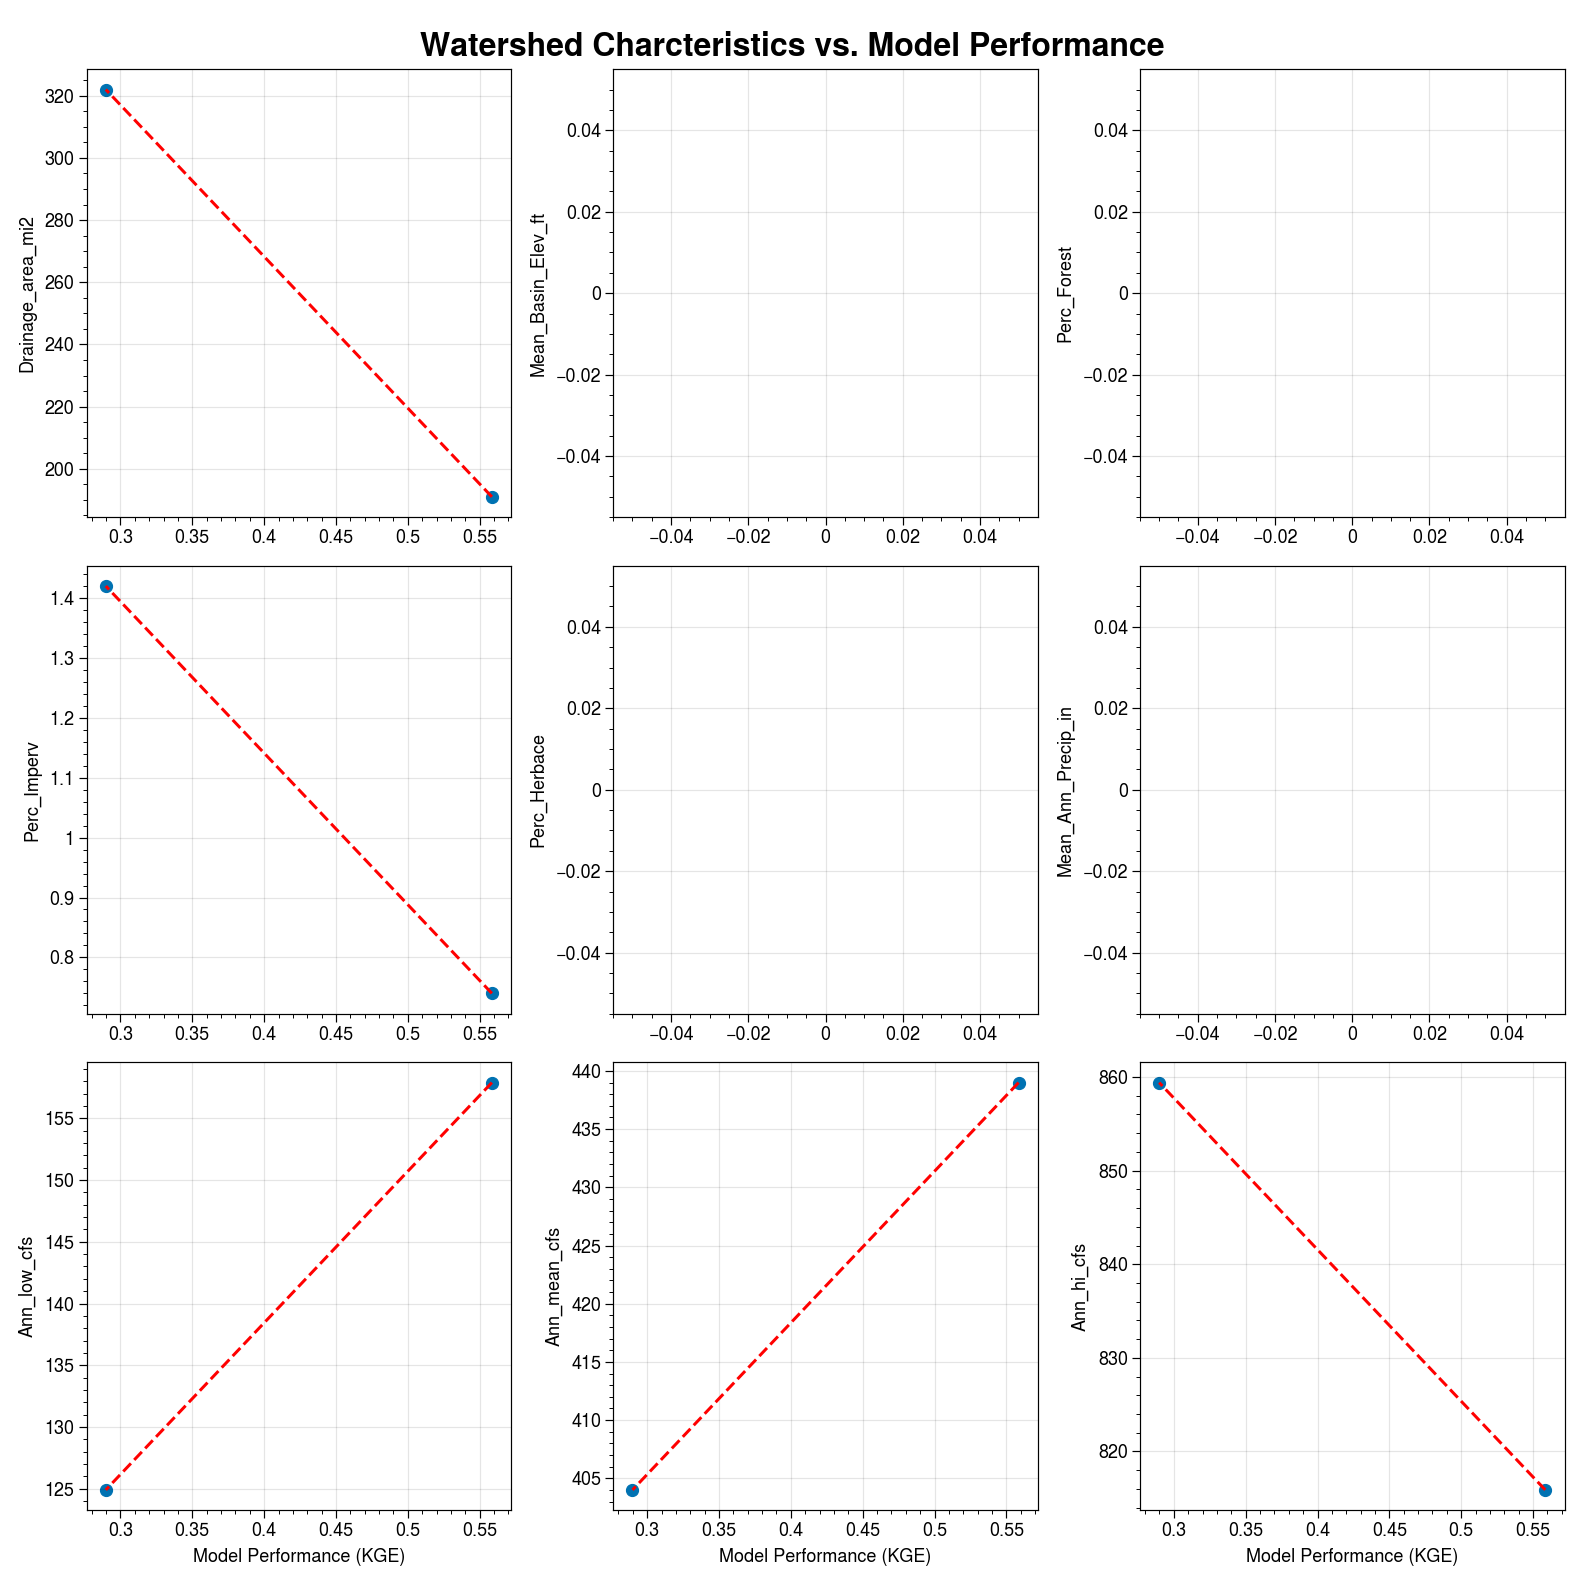

STYX RIVER NEAR ELSANOR, AL.


USGS: 02377570  NWM_v2.1: 2171465
Datetime                                     
2013-04-30    16190.079761          20744.163
2013-05-31    24085.848352          39602.493
2013-06-30    30725.510369          35791.167
2013-07-31    39529.741608          47383.785
2013-08-31    30037.905698          46047.243
2013-09-30    15748.118477          20472.492
2013-10-31     9701.496954          16379.580

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_02377570              :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_2171465 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                           :Rectangles   [x0,y0,x1,y1]
      .Text.I                                 :Text   [x,y]
      .Text.II                                :Text   [x,y]
      .Text.III                               :Text   [x,y]
      .Text.IV                                :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

UCHEE CREEK NEAR FORT MITCHELL, AL.


USGS: 02342500  NWM_v2.1: 3435970
Datetime                                     
2013-04-30    19756.182746          17331.420
2013-05-31    11078.745010          12594.033
2013-06-30    16618.035524          10632.846
2013-07-31    30839.698183          12453.240
2013-08-31    15754.720132          11884.119
2013-09-30     2813.835649           6813.588
2013-10-31     1156.361674           5677.329

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_02342500              :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_3435970 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                           :Rectangles   [x0,y0,x1,y1]
      .Text.I                                 :Text   [x,y]
      .Text.II                                :Text   [x,y]
      .Text.III                               :Text   [x,y]
      .Text.IV                                :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

In [12]:
#Holoviews plots.
freq = 'M'

Reach_Eval.Interactive_Model_Eval(freq, supply =False)